<h3>Data Wrangling</h3>	

The dataset `dereferenced_spike_data` comprises extracellular spike recordings from 44 neurons captured during reaching tasks performed by marmoset monkeys. Each trial represents a reaching movement attempt and is stored as a 2D NumPy array with dimensions (44, T), where T (the number of time bins) varies across trials (e.g., 122 to 175 time bins). The variable trial lengths reflect differences in trial duration and response time.

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Chewie_CO_20150630.mat'
ephys_file = h5py.File(file_path, 'r')

In [2]:
print(ephys_file['trial_data'].keys())

<KeysViewHDF5 ['M1_lfp', 'M1_lfp_guide', 'M1_spikes', 'M1_unit_guide', 'bin_size', 'date_time', 'idx_endTime', 'idx_goCueTime', 'idx_movement_on', 'idx_startTime', 'idx_tgtOnTime', 'idx_trial_end', 'idx_trial_start', 'monkey', 'result', 'tgtDir', 'vel']>


In [3]:
spike_data = ephys_file['trial_data']['M1_spikes'][:]

print("Shape of spike data:", spike_data.shape)
print("First few entries of spike data:\n", spike_data[:5])  # Print the first few trials for inspection


Shape of spike data: (178, 1)
First few entries of spike data:
 [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]]


In [4]:
dereferenced_spike_data = []

for i in range(spike_data.shape[0]):
    ref = spike_data[i, 0]  # Each entry in spike_data is a reference
    if isinstance(ref, h5py.Reference):  # Check if it's a reference
        actual_data = ephys_file[ref][()]  # Dereference and get actual data (spike train)
        dereferenced_spike_data.append(actual_data)

print("First few dereferenced spike data entries:", dereferenced_spike_data[:5])


First few dereferenced spike data entries: [array([[2., 2., 1., ..., 1., 0., 1.],
       [1., 1., 2., ..., 1., 2., 2.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 2.]]), array([[1., 2., 0., ..., 1., 1., 2.],
       [1., 1., 1., ..., 1., 1., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.]]), array([[1., 2., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 2.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[1., 3., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 2.],
       [1., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 2., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0.,

In [5]:
for i, entry in enumerate(dereferenced_spike_data[:5]):  # Check first 5 entries
    print(f"Entry {i}: shape {entry.shape} | type {type(entry)}")

Entry 0: shape (44, 149) | type <class 'numpy.ndarray'>
Entry 1: shape (44, 175) | type <class 'numpy.ndarray'>
Entry 2: shape (44, 122) | type <class 'numpy.ndarray'>
Entry 3: shape (44, 141) | type <class 'numpy.ndarray'>
Entry 4: shape (44, 126) | type <class 'numpy.ndarray'>


In [6]:
trial_dict = {f"Trial_{i}": trial for i, trial in enumerate(dereferenced_spike_data)}

print("Shape of first trial:", trial_dict["Trial_0"].shape)

Shape of first trial: (44, 149)


<h3>Data Visualization</h3>
To explore whether the extracellular spiking activity is a good predictor of reaching behavior, several visualizations were generated to characterize the neural activity across trials.

<h4> 1. Subplots of Raster Plots for the First 10 Trials</h4>
Raster plots provide a detailed view of spike timing across neurons during each reaching attempt. For each trial, the timing of spikes (represented by vertical tick marks) is plotted for all 44 neurons.  To assess trial-to-trial variability, we generated a figure containing subplots of the first 10 trials. This comparative visualization allows for an evaluation of consistency in the spiking patterns across different reaching attempts.

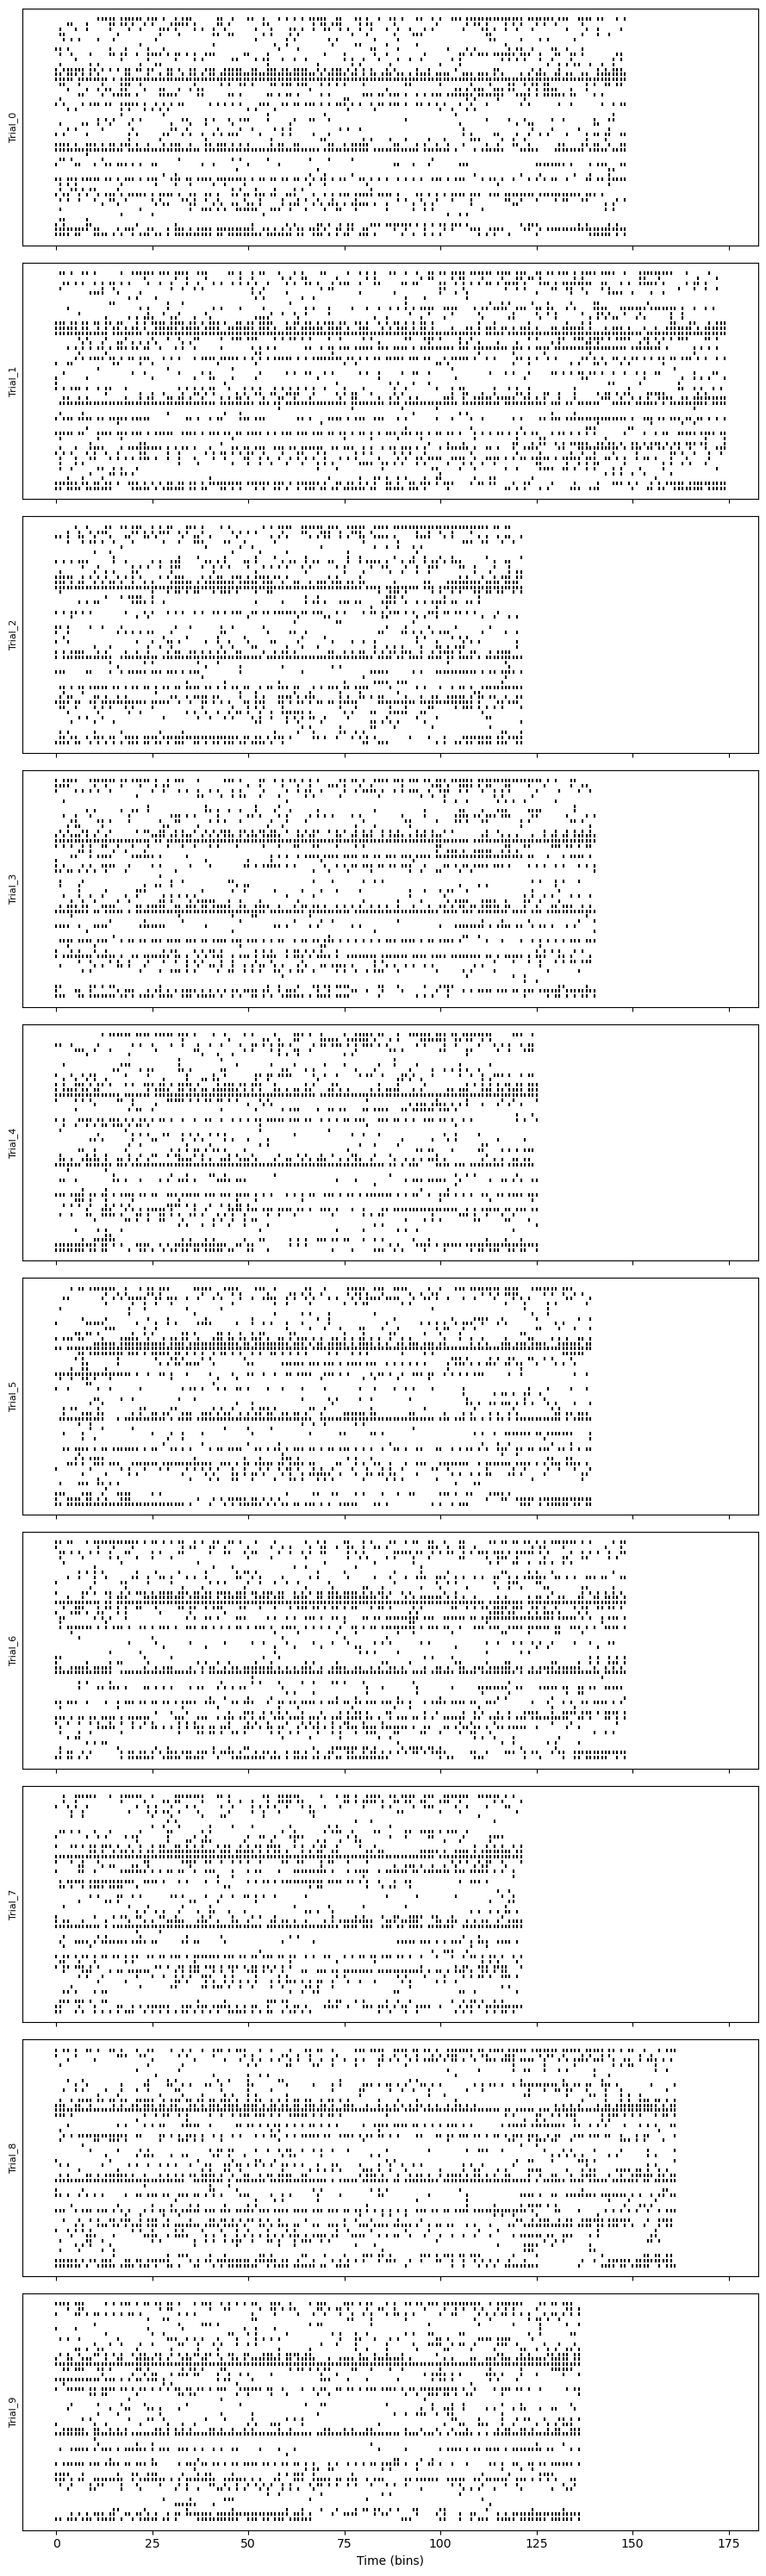

In [12]:
def plot_raster_subplots(trial_dict, num_trials=10):
    fig, axes = plt.subplots(nrows=num_trials, ncols=1, figsize=(9, 3 * num_trials), sharex=True)

    # Iterate over the first `num_trials` trials
    for i, (trial_id, trial_data) in enumerate(list(trial_dict.items())[:num_trials]):
        ax = axes[i]  # Select the corresponding subplot
        num_neurons, num_time_bins = trial_data.shape
        
        for neuron_idx in range(num_neurons):
            spikes = np.where(trial_data[neuron_idx] > 0)[0]  # Find spike times
            ax.scatter(spikes, [neuron_idx] * len(spikes), marker="|", color="black", s=10)

        ax.set_ylabel(f"{trial_id}", fontsize=8)
        ax.set_yticks([])  # Remove y-ticks for a cleaner look

    # Shared x-axis label
    axes[-1].set_xlabel("Time (bins)")
    plt.tight_layout()
    plt.show()

# Call the function
plot_raster_subplots(trial_dict)


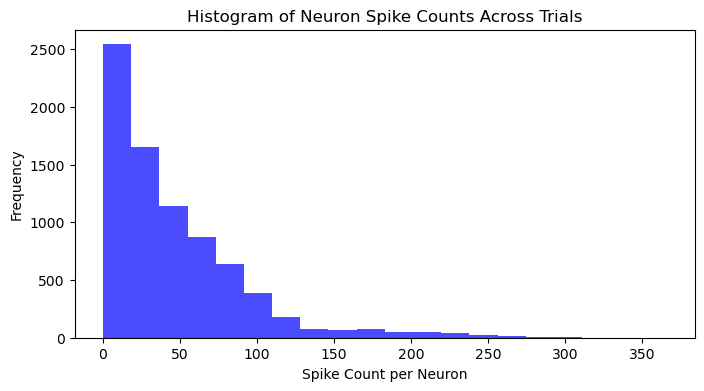

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Histogram of total spike counts per neuron across all trials
spike_counts = []
for trial in dereferenced_spike_data:
    trial_counts = np.sum(trial, axis=1)  # Sum over time bins for each neuron
    spike_counts.extend(trial_counts)
    
plt.figure(figsize=(8, 4))
plt.hist(spike_counts, bins=20, color='blue', alpha=0.7)
plt.xlabel("Spike Count per Neuron")
plt.ylabel("Frequency")
plt.title("Histogram of Neuron Spike Counts Across Trials")
plt.show()


<h4>Heatmap of Neuronal Activity</h4>

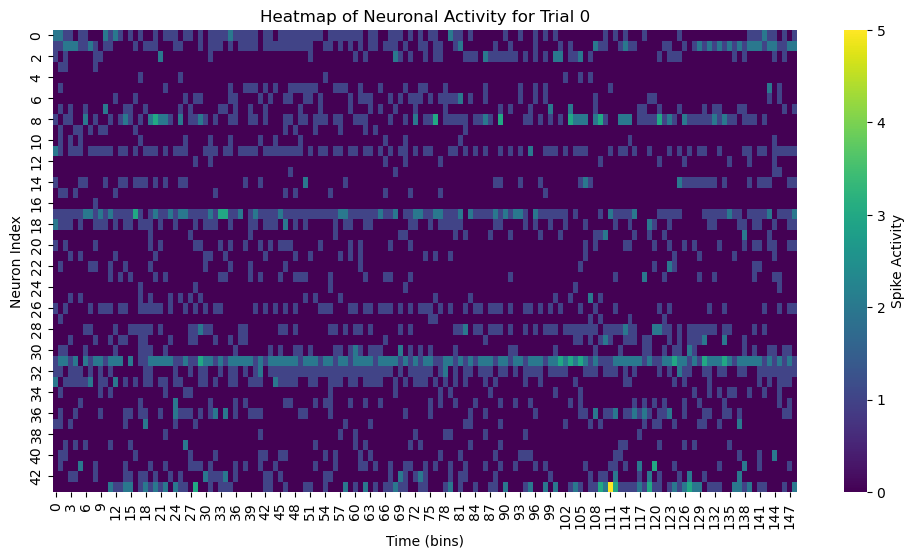

In [14]:
import seaborn as sns

# Example: Heatmap for a single trial (Trial 0)
trial_0 = dereferenced_spike_data[0]
plt.figure(figsize=(12, 6))
sns.heatmap(trial_0, cmap="viridis", cbar_kws={'label': 'Spike Activity'})
plt.xlabel("Time (bins)")
plt.ylabel("Neuron Index")
plt.title("Heatmap of Neuronal Activity for Trial 0")
plt.show()
